# Imports:

In [77]:
!pip install tensorflow_addons
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14065 sha256=756f444b3c565336c45498d945a481c91e54eef5619cda582d53eab3d4ef839c
  Stored in directory: /Users/paulscott/Library/Caches/pip/wheels/ed/8a/c6/40c7ec06c2dd3df636832537238128a1471bf9c1b6a3a9bf40
Successfully built pytesseract


In [79]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, models, preprocessing, losses
import matplotlib.pyplot as plt
from os import listdir, mkdir, path
import numpy as np
from PIL import Image
import pytesseract

# Load Coin Dataset:

In [5]:
labels = listdir('images/')
labels.sort()

if '.DS_Store' in labels:
  labels.remove('.DS_Store')

dataset = preprocessing.image_dataset_from_directory(
  'images/',
  labels="inferred",
  label_mode="int",
  class_names=None,
  color_mode="rgb",
  batch_size=64,
  image_size=(500, 500),
  validation_split=0.1,
  subset="training",
  seed=32,
  shuffle=True
)
dataset_val = preprocessing.image_dataset_from_directory(
  'images/',
  labels="inferred",
  label_mode="int",
  class_names=None,
  color_mode="rgb",
  batch_size=64,
  image_size=(500, 500),
  validation_split=0.1,
  subset="training",
  seed=32,
  shuffle=True
)
dataset = dataset.map(lambda image, label: (image / 255.0, label))

Found 4067 files belonging to 84 classes.


# Display Coin Images:

2021-10-16 14:57:33.829084: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


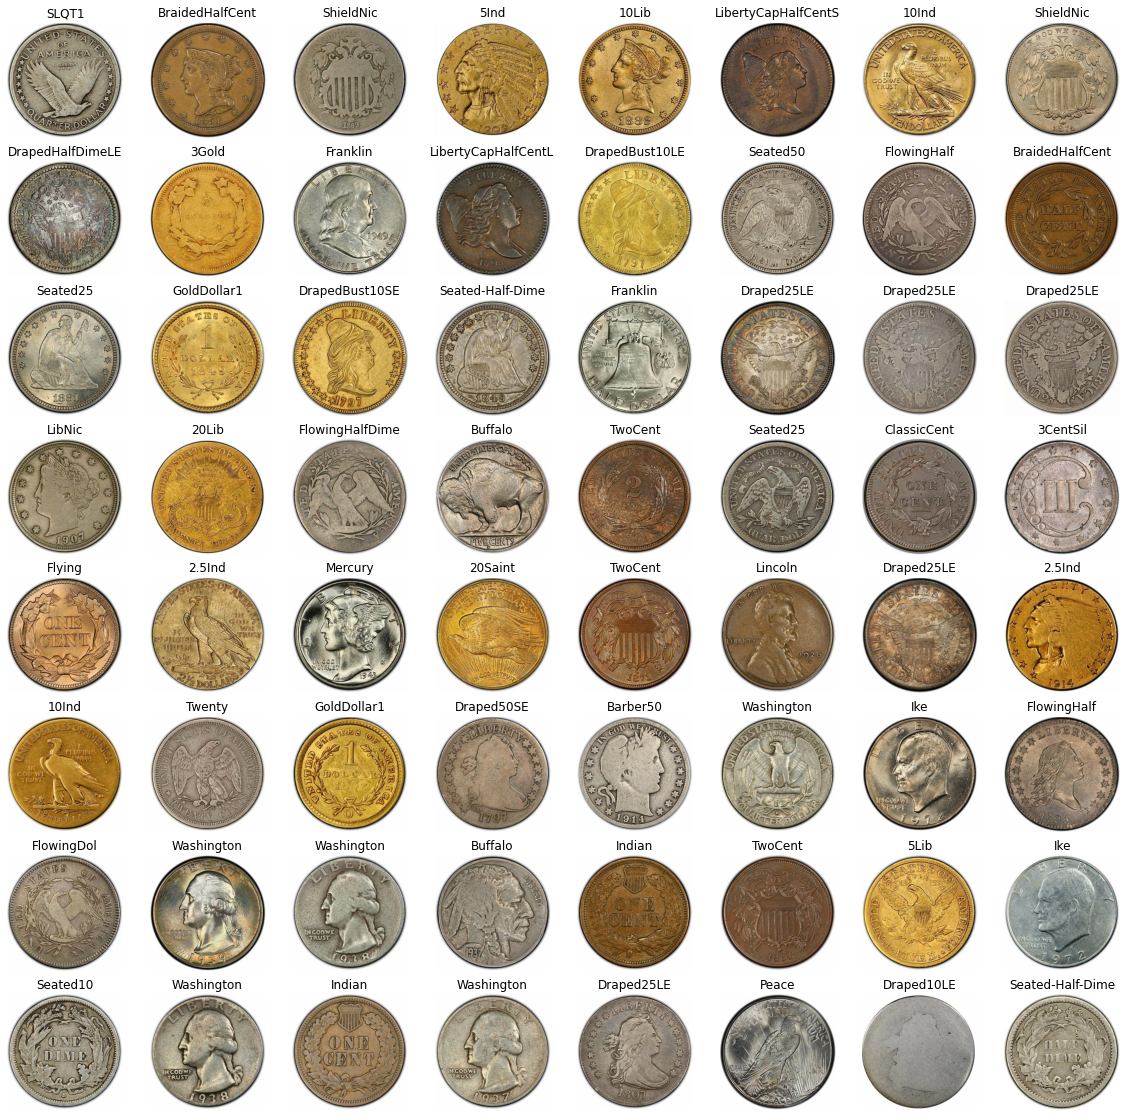

In [6]:
fig = plt.figure(figsize=(16, 16))
X_batch, y_batch = next(dataset.as_numpy_iterator())
for i in range(64):
  fig.add_subplot(8, 8, i + 1)
  plt.imshow(X_batch[i])
  plt.axis('off')
  plt.title(labels[y_batch[i]])

# Create CNN:

In [27]:
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
  layers.MaxPooling2D((4, 4)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((4, 4)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(119),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

# Train Model:

In [53]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(dataset, epochs=1)

64/64 [==============================] - 231s 4s/step - loss: 0.1249 - accuracy: 0.9685


# Save/Load Model:

In [74]:
# model.save('coin_classifier_model')
model = models.load_model('coin_classifier_model')

# Test Images:

In [54]:
correct = {}
total = {}
for i in range(len(labels)):
  correct[i] = 0
  total[i] = 0
for X, y in dataset:
  preds = [np.argmax(pred) for pred in model.predict(X)]
  for i, pred in enumerate(preds):
    true = y[i].numpy()
    if pred == true:
      correct[true] += 1
    total[true] += 1
for label, count in correct.items():
  acc = count / total[label]
  print('%s: %.2f' % (labels[label], acc))

10Ind: 1.00
10Lib: 1.00
1793HalfCent: 0.96
2.5Ind: 0.85
2.5Lib: 1.00
20Lib: 1.00
20Saint: 1.00
3CentNic: 1.00
3CentSil: 0.98
3Gold: 0.98
5Ind: 1.00
5Lib: 1.00
Barber10: 1.00
Barber25: 1.00
Barber50: 0.93
BraidedCent: 1.00
BraidedHalfCent: 1.00
Buffalo: 1.00
Capped10Lg: 1.00
Capped2.5: 1.00
Capped25Lg: 1.00
Capped50: 0.95
CappedBust5: 0.97
CappedHalfDime: 0.98
CappedHead5: 1.00
ChainCent: 0.92
Classic2.5: 1.00
Classic5: 1.00
ClassicCent: 0.98
ClassicHalfCent: 0.94
CoronetCent: 1.00
Draped10LE: 1.00
Draped10SE: 0.85
Draped25LE: 1.00
Draped25SE: 1.00
Draped50LE: 0.98
Draped50SE: 0.98
DrapedBust10LE: 1.00
DrapedBust10SE: 1.00
DrapedBust5LE: 1.00
DrapedBust5SE: 1.00
DrapedBustCent: 0.94
DrapedBustR2.5LE: 0.77
DrapedDolLE: 1.00
DrapedHalfCent: 0.98
DrapedHalfDime: 0.93
DrapedHalfDimeLE: 0.90
FlowingDol: 1.00
FlowingHalf: 0.98
FlowingHalfDime: 1.00
Flying: 1.00
Franklin: 1.00
GldEag: 1.00
GoldDollar1: 1.00
GoldDollar2: 1.00
GoldDollar3: 0.95
Ike: 1.00
Indian: 1.00
Jefferson: 1.00
Kennedy: 0.9

1: SLQT1
2: Draped25LE
3: Lincoln
4: SAC
5: DrapedBustR2.5LE
Text:  



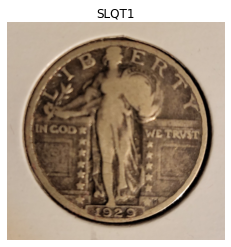

In [99]:
img = Image.open('test4.jpg')
img = img.resize(size=(500, 500))
img_data = np.divide(preprocessing.image.img_to_array(img), 255.0)

# X, y = next(dataset.as_numpy_iterator())
# img_data = X[0]
# print('True: %s' % labels[y[0]])

img_dataset = tf.data.Dataset.from_tensors([img_data])
prediction = model.predict(img_dataset)[0]
plt.title(labels[np.argmax(prediction)])
plt.axis('off')
plt.imshow(img_data)
ranked = np.argsort(prediction)
print('1: %s' % labels[ranked[-1]])
print('2: %s' % labels[ranked[-2]])
print('3: %s' % labels[ranked[-3]])
print('4: %s' % labels[ranked[-4]])
print('5: %s' % labels[ranked[-5]])

print('Text: %s' % pytesseract.image_to_string(img))